In [58]:
import csv                            #Importing all the packages needed
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import nltk
from collections import Counter
import matplotlib.pyplot as plt


In [59]:
root ='..\\data'                                      #Relative path where dataset is stored
l = pd.read_csv(os.path.join(root,'listings.csv'))    #Get the dataset and store it in dataframe


In [60]:
l['price']=l['price'].replace( '[\$,)]','', regex=True ).astype(float)  #Convert the price string to float

In [61]:
myfile = open('analysis3.csv', 'w', encoding='utf-8')            #Create the csv file to show the output
wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
wr.writerow(('Location','Count', 'AveragePrice'))

35

In [62]:
def findMeanPrice(locationName):                        #Function to get mean price for each location
    meanPriceOfLocation=l[ (l['room_type']=='Private room') & (l['neighbourhood']== locationName)]['price'].mean()
    return meanPriceOfLocation

In [63]:
l=l[l['neighbourhood'].notnull()]                       #Remove the rows which has no location
filtered_words = [word for word in l['neighbourhood']]
counter=Counter(filtered_words).most_common(5)           #Get all the neighbourhood in decending order
loc=[]
averagePrice=[]
frequentVisit=[]
for location in counter:                                #Get the mean price of each neighbourhood
    loc.append(location[0][:10])
    price=findMeanPrice(location[0])
    averagePrice.append(price)                          
    frequentVisit.append(location[1])                   #Get the count of each neighbourhood
    wr.writerow((location[0],location[1],price))        #Put the output in an excel sheet



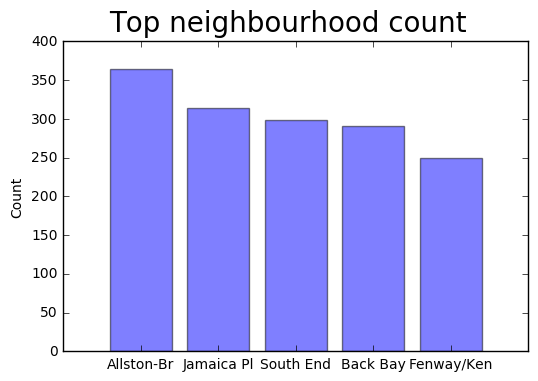

In [64]:
y_pos = np.arange(len(loc))
plt.bar(y_pos, frequentVisit, align='center', alpha=0.5)
plt.suptitle('Top neighbourhood count', fontsize=20)
plt.xticks(y_pos, loc)
plt.ylabel('Count')
 
plt.show()
plt.savefig('analysis3a.png')


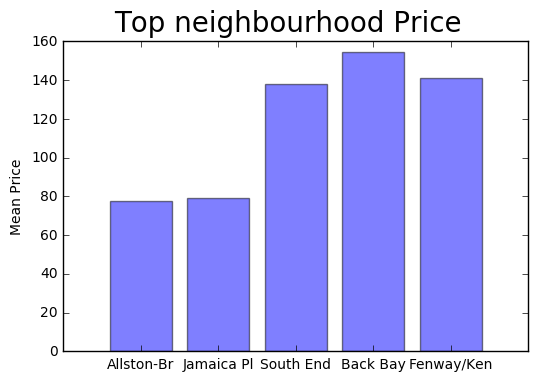

In [65]:
y_pos = np.arange(len(loc))
plt.bar(y_pos, averagePrice, align='center', alpha=0.5)
plt.suptitle('Top neighbourhood Price', fontsize=20)
plt.xticks(y_pos, loc)
plt.ylabel('Mean Price')
 
plt.show()
plt.savefig('analysis3b.png')
